
Sobre o Conjunto de Dados

As doenças cardiovasculares são a causa número 1 de morte em todo o mundo, levando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo.

A insuficiência cardíaca é um evento comum causado por DCVs e este conjunto de dados contém 12 recursos que podem ser usados para prever a mortalidade por insuficiência cardíaca.

A maioria das doenças cardiovasculares pode ser prevenida abordando os fatores de risco comportamentais, como uso de tabaco, dieta não saudável e obesidade, sedentarismo e uso nocivo de álcool, usando estratégias para toda a população.

O nosso projeto tem como objetivo promover uma rotina saudavel para a população visando a comercialização de produtos organicos e complementando com receitas fácieis e praticas para preparar ao longo da semana e podendo assim, adotar uma melhor qualidade de vida.  

O Dataset a seguir, apresenta um dados obtidos na pesquisa sobre obesidade

In [ ]:
%pip install pandas
%pip install matplotlib
%pip install plotly

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
file_id = "1OByi2ATfbRTCok2nrvbFTgkQrcOtSKU0"

url = 'https://drive.google.com/uc?id={}'.format(file_id)

df = pd.read_csv(url)

In [ ]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

#Analise de IMC Global

In [ ]:
faixasIMC=["<= 16,9 Muito abaixo do peso","17 a 18,4 Abaixo do peso","18,5 a 24,9 Peso normal","25 a 29,9 Acima do peso",
           "30 a 34,9 Obesidade I", "35 a 40 Obesidade II", "> 40 Obesidade III"]
faixas=[]
for i in range(len(df)):
  if (df.iloc[i]["BMI"]<=16.9):
    faixas.append(faixasIMC[0])
  elif (df.iloc[i]["BMI"]<=18.4):
    faixas.append(faixasIMC[1])
  elif (df.iloc[i]["BMI"]<=24.9):
   faixas.append(faixasIMC[2])
  elif (df.iloc[i]["BMI"]<=29.9):
   faixas.append(faixasIMC[3])
  elif (df.iloc[i]["BMI"]<=34.9):
   faixas.append(faixasIMC[4])
  elif (df.iloc[i]["BMI"]<=40):
   faixas.append(faixasIMC[5])
  else:
   faixas.append(faixasIMC[6])

df["FaixasIMC"]=faixas

IMC=df['FaixasIMC']

gdf=df[['FaixasIMC','BMI']].groupby("FaixasIMC").count().reset_index()
print(gdf)

                  FaixasIMC   BMI
0  17 a 18,4 Abaixo do peso   164
1   18,5 a 24,9 Peso normal  2621
2   25 a 29,9 Acima do peso  2062
3     30 a 34,9 Obesidade I  1927
4      35 a 40 Obesidade II  1989


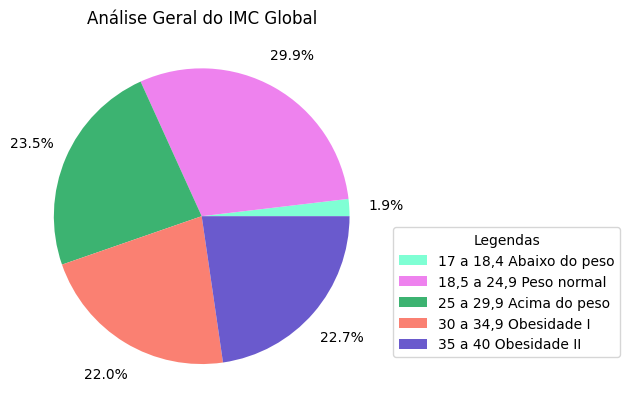

In [ ]:
eixoY = gdf['FaixasIMC']
eixoX = gdf['BMI']

cores = ['aquamarine', 'violet', 'mediumseagreen', 'salmon', 'slateblue']

plt.pie(eixoX, labels=None, autopct='%1.1f%%', explode=[0, 0, 0, 0, 0], colors=cores, pctdistance=1.25)

plt.legend(eixoY, title="Legendas", bbox_to_anchor=(1, 0.1), loc="lower left")

plt.title("Análise Geral do IMC")
plt.show()

#Alimentação, genero e estilo de vida

versao geral

In [ ]:
df_heatmap = df.groupby(["Diet", "Sex"])["Sedentary Hours Per Day"].mean().reset_index()
df_heatmap = pd.pivot_table(df_heatmap, values='Sedentary Hours Per Day', index=['Diet'], columns=['Sex'])

fig = px.imshow(df_heatmap, title="Alimentação e Sedentarismo uma visão global",
                labels=dict(x="Sexo", y="Dieta", color="Sedentarismo por hora no dia"))
fig.show()

versao apenas no brasil

In [ ]:

# Assuming df is your DataFrame containing the data
df_brazil = df[df["Country"] == "Brazil"]

# Create a grouped DataFrame for the heatmap
df_heatmap = df_brazil.groupby(["Diet", "Sex"])["Sedentary Hours Per Day"].mean().reset_index()

# Create a pivot table
df_heatmap = pd.pivot_table(df_heatmap, values='Sedentary Hours Per Day', index=['Diet'], columns=['Sex'])

# Create the heatmap using plotly.express
fig = px.imshow(df_heatmap, title="Alimentação e Sedentarismo com foco no Brasil",
                labels=dict(x="Sexo", y="Dieta", color="Sedentarismo por hora no dia"))
fig.show()


#Idade e IMC

In [ ]:
faixasIdade = ["20 Anos para baixo", "Entre 21 a 30 anos", "Entre 31 a 40 anos", "Entre 41 a 50 anos",
               "Entre 51 a 60 anos", "Acima de 60 anos"]



faixas2 = [None] * len(df)

for i in range(len(df)):
    if df.iloc[i]["Country"] == "Brazil":
        if df.iloc[i]["Age"] <= 20:
            faixas2[i] = faixasIdade[0]
        elif df.iloc[i]["Age"] <= 30:
            faixas2[i] = faixasIdade[1]
        elif df.iloc[i]["Age"] <= 40:
            faixas2[i] = faixasIdade[2]
        elif df.iloc[i]["Age"] <= 50:
            faixas2[i] = faixasIdade[3]
        elif df.iloc[i]["Age"] <= 60:
            faixas2[i] = faixasIdade[4]
        else:
            faixas2[i] = faixasIdade[5]



df["FaixasIdade"] = faixas2

df_brazil = df[df["Country"] == "Brazil"]

df_brazil['FaixasIdade'] = pd.Categorical(df_brazil['FaixasIdade'], categories=faixasIdade, ordered=True)

print(df_brazil['FaixasIdade'].value_counts())

df_idadeIMC = df_brazil.groupby(["FaixasIdade"])["BMI"].mean().reset_index()

print(df_idadeIMC)


Acima de 60 anos      184
Entre 21 a 30 anos     74
Entre 41 a 50 anos     64
Entre 31 a 40 anos     63
Entre 51 a 60 anos     58
20 Anos para baixo     19
Name: FaixasIdade, dtype: int64
          FaixasIdade        BMI
0  20 Anos para baixo  30.534266
1  Entre 21 a 30 anos  28.363321
2  Entre 31 a 40 anos  29.675587
3  Entre 41 a 50 anos  28.791758
4  Entre 51 a 60 anos  28.121062
5    Acima de 60 anos  28.969791


<ipython-input-40-bfb542accc05>:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



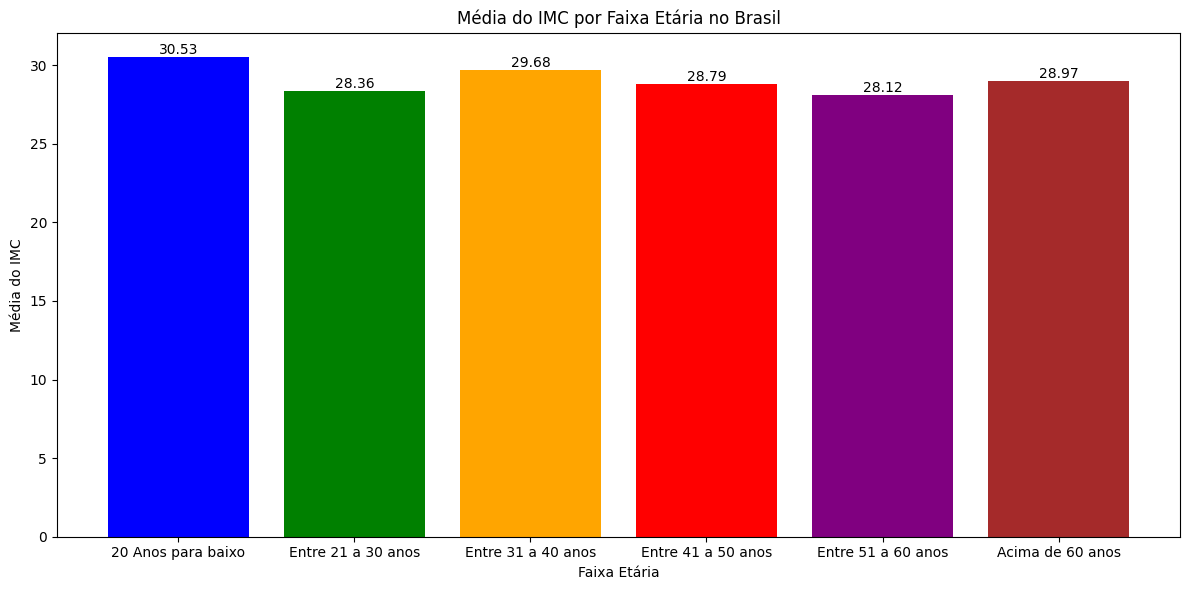

In [ ]:
colors = {
    "20 Anos para baixo": 'blue',
    "Entre 21 a 30 anos": 'green',
    "Entre 31 a 40 anos": 'orange',
    "Entre 41 a 50 anos": 'red',
    "Entre 51 a 60 anos": 'purple',
    "Acima de 60 anos": 'brown'
}

plt.figure(figsize=(12, 6))
bars = plt.bar(df_idadeIMC['FaixasIdade'], df_idadeIMC['BMI'], color=[colors[group] for group in df_idadeIMC['FaixasIdade']])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.title('Média do IMC por Faixa Etária no Brasil')
plt.xlabel('Faixa Etária')
plt.ylabel('Média do IMC')
plt.tight_layout()
plt.show()